In [ ]:
%%capture

!pip install transformers datasets evaluate

In [ ]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
# Если нужно отключить логирование в W&B

# import os

# os.environ['WANDB_DISABLED'] = 'true'
# os.environ['WANDB_MODE'] = 'disabled'

# Text classification

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/leNG9fN9FQU?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Классификация текста — это распространенная задача в NLP, в рамках которой тексту присваивается метка или класс. Некоторые крупные компании используют классификацию текста в проде для широкого спектра задач и практических приложений. Одной из самых популярных форм классификации текста является sentiment analysis - анализ тональности, в котором тексту присваивается, например 🙂 положительная метка, 🙁 отрицательная или 😐 нейтральная.

В этом руководстве рассматривается:

1. Дообучение модели [DistilBERT](https://huggingface.co/distilbert-base-uncased) на датасете [IMDb](https://huggingface.co/datasets/imdb) для определения, является ли обзор фильма положительным или отрицательным.
2. Использование дообученной модели для инференса

<Tip>
Задача, проиллюстрированная в этом руководстве, поддерживается следующими архитектурами моделей:

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BART](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bart), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BigBird-Pegasus](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bigbird_pegasus), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CANINE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/canine), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [CTRL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ctrl), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ErnieM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie_m), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [GPT Neo](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neo), [GPT NeoX](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox), [GPT-J](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gptj), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [LayoutLMv2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv2), [LayoutLMv3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv3), [LED](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/led), [LiLT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/lilt), [LLaMA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/llama), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [MarkupLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/markuplm), [mBART](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mbart), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [MVP](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mvp), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [OpenLlama](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/open-llama), [OpenAI GPT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/openai-gpt), [OPT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/opt), [Perceiver](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/perceiver), [PLBart](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/plbart), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [Reformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/reformer), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [TAPAS](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/tapas), [Transformer-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/transfo-xl), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)


<!--End of the generated tip-->

</Tip>

Прежде чем начать, убедитесь, что у вас установлены все необходимые библиотеки:

```
pip install transformers datasets evaluate
```

## Немного о DistilBERT...


Использует почти ту же архитектуру, что и BERT, но только с 6 блоками энкодера (в base BERT их 12). Эти блоки инициализируются простым взятием одного из каждых двух предобученных блоков энкодеров BERT.

В отличие от BERT, DistilBERT предобучается только через моделирование языка по маске (оставили MLM и убрали Next Sentence Prediction). DistilBERT обучается с использованием тройного лосса:

- Тот же лосс языковой модели, что и в BERT;

- Лосс дистилляции измеряет сходство выходов между DistilBERT и BERT;

- Лосс косинусового расстояния измеряет, насколько похожи скрытые состояния DistilBERT и BERT.

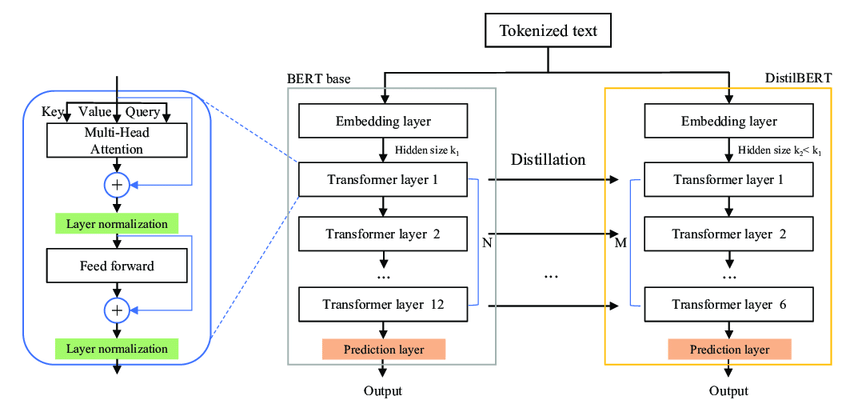

[DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter](https://arxiv.org/abs/1910.01108)

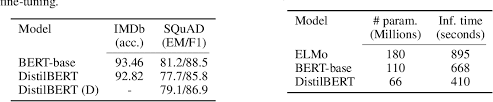

## Load IMDb dataset

[imdb](https://huggingface.co/datasets/stanfordnlp/imdb)

Начнем с загрузки набора данных IMDb из библиотеки 🤗 Datasets:

In [ ]:
from datasets import load_dataset

imdb = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Посмотрим на отдельный элемент датасета:

In [ ]:
imdb["test"][100]

{'text': '"Cover Girl" is a lacklustre WWII musical with absolutely nothing memorable about it, save for its signature song, "Long Ago and Far Away." This film came out before Gene Kelly really hit his artistic stride, and while there are evidences of his burgeoning talent here, mostly he plays sidekick to Rita Hayworth. And there\'s the problem. Rita Hayworth is gorgeous, no doubt about that. But she\'s simply not a compelling screen presence. I\'ve always found myself wanting to like her more than I actually do, and this movie is no exception. She\'s simply not a very good actress, and she\'s not even a very good dancer. Good looking as she is, there\'s something vapid about her, and this movie suffers because of it.<br /><br />Grade: C-',
 'label': 0}

В этом наборе данных есть два поля:

- `text`: текст обзора фильма.
- `label`: значение, которое равно `0` для негативного обзора или `1` для позитивного обзора.

## Предобработка

Следующим шагом будет загрузка токенизатора DistilBERT для предварительной обработки поля `text`:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Создадим функцию предварительной обработки для токенизации `text` и усечения последовательностей так, чтобы они не превышали максимальную длину входных данных DistilBERT:

[Padding & Truncation](https://huggingface.co/docs/transformers/pad_truncation)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

Чтобы применить функцию предобработки ко всему набору данных, используем функцию 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map). Вы можете ускорить `map`, установив `batched=True` для обработки нескольких элементов набора данных одновременно:

In [ ]:
tokenized_imdb = imdb.map(preprocess_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Теперь создадим батч с помощью [DataCollatorWithPadding](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorWithPadding). Он позволяет более эффективно *динамически дополнять* предложения до самой большой длины в батче во время сортировки, вместо того, чтобы дополнять весь набор данных до максимальной длины.

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## Оценка качества

Замеры метрики во время обучения полезны для оценки производительности модели. Можно быстро загрузить необходимую метрику  с помощью библиотеки 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index). Для этой задачи загрузим метрику [accuracy](https://huggingface.co/spaces/evaluate-metric/accuracy) (см. 🤗 Evaluate [quick tour](https://huggingface.co/docs/evaluate/a_quick_tour), чтобы узнать больше о том, как загрузить и вычислить метрику):

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

Затем создадим функцию, которая передаст прогнозы и метки в [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) для расчета точности:

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

Функция `compute_metrics` готова к работе, и мы вернемся к ней, когда настроим процесс обучения.

## Обучение

Прежде чем приступить к обучению модели, создадим маппинг ожидаемых меток классов с их id с помощью `id2label` и `label2id`:

In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

<Tip>

Если вы не знакомы с дообучением модели с помощью [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer), ознакомьтесь с базовым руководством [здесь](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-with-pytorch-trainer)!

</Tip>

Мы готовы начать обучение модели прямо сейчас! Загрузим DistilBERT с [AutoModelForSequenceClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSequenceClassification) задав количество меток классов и маппинги меток:

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

model = model.to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


На этом этапе осталось только три шага:

1. Определить гиперпараметры обучения в [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments). Единственным обязательным параметром является `output_dir`, который указывает, где сохранить модель. Можно отправить модель в HuggingFace Hub, установив `push_to_hub=True` (перед этим нужно войти в Hugging Face, чтобы загрузить свою модель). В конце каждой эпохи [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) оценит точность и сохранит контрольную точку обучения.
2. Передать аргументы обучения в [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) вместе с моделью, набором данных, токенизатором, data collator и функцией `compute_metrics`.
3. Вызвать [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) для дообучения.

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    num_train_epochs=0.1,
    eval_steps=200,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["train"],
    eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-14-3ff911f264ff>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
0,No log,0.299743,0.880760


TrainOutput(global_step=125, training_loss=0.4348410949707031, metrics={'train_runtime': 1212.4081, 'train_samples_per_second': 2.062, 'train_steps_per_second': 0.103, 'total_flos': 329900742238800.0, 'train_loss': 0.4348410949707031, 'epoch': 0.1})

<Tip>

[Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) применяет динамический паддинг по умолчанию, когда вы передаете ему `tokenizer`. В этом случае вам не нужно явно указывать data collator.

</Tip>

<Tip>

Для более подробного примера того, как дообучить модель для классификации текста, взгляните на соответствующий
[ноутбук PyTorch](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/text_classification.ipynb)
или [ноутбук TensorFlow](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/text_classification-tf.ipynb).

</Tip>

## Инференс

Отлично, теперь, когда модель дообучена, можно использовать ее для инференса!

Возьмем текст, для которого нужно сделать предсказание:

In [ ]:
text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."

Самый простой способ опробовать дообученную модель для вывода — использовать ее в [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Создадим `pipeline` для анализа тональности с помощью нашей модели и передадим в него свой текст:

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="my_awesome_model")
classifier(text)

config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9994940757751465}]

Также можно вручную воспроизвести результаты `pipeline`:

Токенизировать текст и вернуть тензоры PyTorch

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("my_awesome_model")
inputs = tokenizer(text, return_tensors="pt")

Передать входные данные в модель и получить `логиты`:

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("my_awesome_model")
with torch.no_grad():
    logits = model(**inputs).logits

Получите класс с наибольшей вероятностью и использовать отображение `id2label` модели, чтобы преобразовать его в текстовую метку:

In [ ]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'LABEL_1'

# Token classification

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wVHdVlPScxA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Классификация токенов присваивает метку отдельным токенам в предложении. Одной из наиболее распространенных задач классификации токенов является распознавание именованных сущностей (NER). NER пытается найти метку для каждой сущности в предложении, например, человека, местоположения или организации.


В этом руководстве рассматривается:

1. Дообучение модели [DistilBERT](https://huggingface.co/distilbert-base-uncased) на датасете  [WNUT 17](https://huggingface.co/datasets/wnut_17) для задачи NER.

2. Использование дообученной модели для инференса

<Tip>
Задача, проиллюстрированная в этом руководстве, поддерживается следующими архитектурами моделей:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CANINE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/canine), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ErnieM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie_m), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [GPT Neo](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neo), [GPT NeoX](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [LayoutLMv2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv2), [LayoutLMv3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv3), [LiLT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/lilt), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [MarkupLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/markuplm), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)

<!--End of the generated tip-->

</Tip>

Прежде чем начать, убедитесь, что у вас установлены все необходимые библиотеки:

```
pip install transformers datasets evaluate
```

Мы рекомендуем вам войти в свою учетную запись Hugging Face, чтобы вы могли загрузить свою модель и поделиться ей с сообществом.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## Load WNUT 17 dataset

Начнем с загрузки набора данных WNUT 17 из библиотеки 🤗 Datasets:

In [ ]:
from datasets import load_dataset

wnut = load_dataset("wnut_17")

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

wnut_17.py:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

The repository for wnut_17 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wnut_17.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/3394 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1009 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1287 [00:00<?, ? examples/s]

Посмотрим на отдельный элемент датасета:

In [ ]:
wnut["train"][0]

{'id': '0',
 'tokens': ['@paulwalk',
  'It',
  "'s",
  'the',
  'view',
  'from',
  'where',
  'I',
  "'m",
  'living',
  'for',
  'two',
  'weeks',
  '.',
  'Empire',
  'State',
  'Building',
  '=',
  'ESB',
  '.',
  'Pretty',
  'bad',
  'storm',
  'here',
  'last',
  'evening',
  '.'],
 'ner_tags': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  8,
  8,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

Каждое число в `ner_tags` представляет сущность. Преобразуем числа в имена меток, чтобы узнать, что это за сущности:

In [ ]:
label_list = wnut["train"].features[f"ner_tags"].feature.names
label_list

['O',
 'B-corporation',
 'I-corporation',
 'B-creative-work',
 'I-creative-work',
 'B-group',
 'I-group',
 'B-location',
 'I-location',
 'B-person',
 'I-person',
 'B-product',
 'I-product']

Буква, которая предшествует каждому `ner_tag`, указывает на позицию токена сущности:

- `B-` указывает на начало сущности.
- `I-` указывает на токен, который содержится внутри той же сущности (например, токен `State` является частью сущности, такой как
`Empire State Building`).
- `0` указывает на токен, который не соответствует ни одной сущности.

## Предобработка

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iY2AZYdZAr0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Следующим шагом будет загрузка токенизатора DistilBERT для предварительной обработки поля `tokens`:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Как вы видели в примере поля `tokens` выше, похоже, что ввод уже был токенизирован. Но на самом деле ввод еще не был токенизирован, и вам нужно будет установить `is_split_into_words=True`, чтобы токенизировать слова в подслова. Например:

In [ ]:
example = wnut["train"][0]
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['[CLS]',
 '@',
 'paul',
 '##walk',
 'it',
 "'",
 's',
 'the',
 'view',
 'from',
 'where',
 'i',
 "'",
 'm',
 'living',
 'for',
 'two',
 'weeks',
 '.',
 'empire',
 'state',
 'building',
 '=',
 'es',
 '##b',
 '.',
 'pretty',
 'bad',
 'storm',
 'here',
 'last',
 'evening',
 '.',
 '[SEP]']

Можно увидеть, что во время токенизации добавляются некоторые специальные токены `[CLS]` и `[SEP]`, а токенизация подслов создает несоответствие между входными данными и метками. Одно слово, соответствующее одной метке, теперь может быть разделено на два подслова. Нужно будет перестроить токены и метки следующим образом:

1. Сопоставить все токены с их соответствующим словом с помощью метода [`word_ids`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.word_ids).
2. Присвоить метку `-100` специальным токенам `[CLS]` и `[SEP]`, чтобы они игнорировались функцией потерь PyTorch.
3. Пометить только первый токен заданного слова. Присвоить `-100` другим подтокенам из того же слова.

Вот как можно создать функцию для перераспределения токенов и меток, а также обрезания последовательностей так, чтобы они не превышали максимальную длину входных данных DistilBERT:

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

Чтобы применить функцию преобработки ко всему набору данных, используем функцию 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map). Вы можете ускорить функцию `map`, установив `batched=True` для обработки нескольких элементов набора данных одновременно:

In [ ]:
tokenized_wnut = wnut.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/1009 [00:00<?, ? examples/s]

Теперь создадим пакет примеров с помощью [DataCollatorWithPadding](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorWithPadding), который будет *динамически дополнять* предложения до самой большой длины в батче во время сортировки, вместо того, чтобы дополнять весь набор данных до максимальной длины.

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

## Оценка качества

Замеры метрики во время обучения полезны для оценки производительности модели. Можно быстро загрузить необходимую метрику  с помощью библиотеки 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index). Для этой задачи загрузим метрики из [seqeval](https://huggingface.co/spaces/evaluate-metric/seqeval).
Seqeval выдает несколько оценок: точность, полноту, F1 и точность.

In [ ]:
%%capture

!pip install seqeval

In [ ]:
import evaluate

seqeval = evaluate.load("seqeval")

Получим метки NER, а затем создадим функцию, которая передаст истинные прогнозы и истинные метки в [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) для расчета оценок:

In [ ]:
import numpy as np

labels = [label_list[i] for i in example[f"ner_tags"]]


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

Функция `compute_metrics` готова к работе, и мы вернемся к ней, когда настроим обучение.

## Обучение

Прежде чем приступить к обучению модели, создадим маппинг ожидаемых меток классов с их id с помощью `id2label` и `label2id`:

In [ ]:
id2label = {
    0: "O",
    1: "B-corporation",
    2: "I-corporation",
    3: "B-creative-work",
    4: "I-creative-work",
    5: "B-group",
    6: "I-group",
    7: "B-location",
    8: "I-location",
    9: "B-person",
    10: "I-person",
    11: "B-product",
    12: "I-product",
}
label2id = {
    "O": 0,
    "B-corporation": 1,
    "I-corporation": 2,
    "B-creative-work": 3,
    "I-creative-work": 4,
    "B-group": 5,
    "I-group": 6,
    "B-location": 7,
    "I-location": 8,
    "B-person": 9,
    "I-person": 10,
    "B-product": 11,
    "I-product": 12,
}

Мы готовы начать обучение модели прямо сейчас! Загрузим DistilBERT с [AutoModelForTokenClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForTokenClassification) вместе с количеством ожидаемых меток и маппингами меток:

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=13, id2label=id2label, label2id=label2id
)

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


На этом этапе осталось только три шага:

1. Определить гиперпараметры обучения в [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments). Единственным обязательным параметром является `output_dir`, который указывает, где сохранить модель. Можно отправить модель в HuggingFace Hub, установив `push_to_hub=True` (перед этим нужно войти в Hugging Face, чтобы загрузить свою модель). В конце каждой эпохи [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) оценит точность и сохранит контрольную точку обучения.
2. Передать аргументы обучения в [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) вместе с моделью, набором данных, токенизатором, data collator и функцией `compute_metrics`.
3. Вызвать [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) для дообучения.

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_wnut_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_wnut["train"],
    eval_dataset=tokenized_wnut["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-56-6631b2340af0>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.285625,0.617169,0.246525,0.352318,0.938566
2,No log,0.270577,0.566890,0.314180,0.404293,0.942157
3,0.185700,0.271100,0.539028,0.339203,0.416382,0.943953


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=639, training_loss=0.16251122112005528, metrics={'train_runtime': 99.0207, 'train_samples_per_second': 102.827, 'train_steps_per_second': 6.453, 'total_flos': 137784250920420.0, 'train_loss': 0.16251122112005528, 'epoch': 3.0})

После завершения обучения отправим свою модель в Hub с помощью метода [push_to_hub()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.push_to_hub), чтобы каждый мог использовать эту модель:

In [ ]:
trainer.push_to_hub()

events.out.tfevents.1732109854.3368db735ada.1815.2:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/masterkristall/my_awesome_wnut_model/commit/525362aa15c1a039c3b701f87e468d3fe64b9c3c', commit_message='End of training', commit_description='', oid='525362aa15c1a039c3b701f87e468d3fe64b9c3c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/masterkristall/my_awesome_wnut_model', endpoint='https://huggingface.co', repo_type='model', repo_id='masterkristall/my_awesome_wnut_model'), pr_revision=None, pr_num=None)

## Инференс

Отлично, теперь можно использовать дообученную модель для инфреенса!

Выберем текст:

In [ ]:
text = "The Golden State Warriors are an American professional basketball team based in San Francisco."

Самый простой способ опробовать нашу модель для вывода — использовать ее в [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Создадим `pipeline` для NER с моделью и передадим в него свой текст:

In [ ]:
from transformers import pipeline

classifier = pipeline("ner", model="masterkristall/my_awesome_wnut_model")
classifier(text)

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'entity': 'B-group',
  'score': 0.19262852,
  'index': 1,
  'word': 'the',
  'start': 0,
  'end': 3},
 {'entity': 'B-location',
  'score': 0.55833477,
  'index': 2,
  'word': 'golden',
  'start': 4,
  'end': 10},
 {'entity': 'I-location',
  'score': 0.34889725,
  'index': 3,
  'word': 'state',
  'start': 11,
  'end': 16},
 {'entity': 'I-group',
  'score': 0.21442294,
  'index': 4,
  'word': 'warriors',
  'start': 17,
  'end': 25},
 {'entity': 'B-location',
  'score': 0.6991935,
  'index': 13,
  'word': 'san',
  'start': 80,
  'end': 83},
 {'entity': 'B-location',
  'score': 0.55013347,
  'index': 14,
  'word': 'francisco',
  'start': 84,
  'end': 93}]

Мы также можем вручную воспроизвести результаты `pipeline`.

Токенизировать текст и вернуть тензоры PyTorch:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("masterkristall/my_awesome_wnut_model")
inputs = tokenizer(text, return_tensors="pt")

Передать входные данные в модель и получить `логиты`:

In [ ]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("masterkristall/my_awesome_wnut_model")
with torch.no_grad():
    logits = model(**inputs).logits

Получить класс с наибольшей вероятностью и используйте отображение `id2label` модели, чтобы преобразовать его в текстовую метку:

In [ ]:
predictions = torch.argmax(logits, dim=2)
predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]
predicted_token_class

['O',
 'B-group',
 'B-location',
 'I-location',
 'I-group',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-location',
 'B-location',
 'O',
 'O']

# Masked language modeling

Masked language modeling предсказывает замаскированный токен в последовательности, и модель может обрабатывать токены в двух направлениях. Это означает, что модель имеет полный доступ к токенам слева и справа. Моделирование языка с маской отлично подходит для задач, которые требуют хорошего контекстного понимания всей последовательности. BERT является примером masked language model.

В этом руководстве рассматривается:

1. Дообучение модели [DistilRoBERTa](https://huggingface.co/distilbert/distilroberta-base) на датасете [ELI5](https://huggingface.co/datasets/sentence-transformers/eli5)
2. Использование дообученной модели для инференса

<Совет>
Вы можете дообучить другие архитектуры для этой же задачи, выполнив те же шаги в этом руководстве.
Выберите одну из следующих архитектур:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BART](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bart), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [mBART](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mbart), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [MVP](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mvp), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [Perceiver](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/perceiver), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [Reformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/reformer), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [TAPAS](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/tapas), [Wav2Vec2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/wav2vec2), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)

<!--End of the generated tip-->

</Tip>

## Load ELI5 dataset

Начнем с загрузки меньшего подмножества датасета ELI5 из библиотеки 🤗 Datasets. Это даст возможность поэкспериментировать и убедиться, что все работает, прежде чем тратить больше времени на обучение на полном наборе данных.

In [ ]:
from datasets import load_dataset

eli5 = load_dataset("sentence-transformers/eli5", split="train[:5000]")

Разделим набор данных `train_asks` на обучающий и тестовый наборы с помощью метода [train_test_split](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.train_test_split):

In [ ]:
eli5 = eli5.train_test_split(test_size=0.2)

Посмотрим на отдельный элемент датасета

In [ ]:
eli5["train"][0]

{'question': 'r/KotakuInAction and "Gamergate"',
 'answer': 'KIA and gamergate is anti SJW. GamerGate began due to the accusation of a female game developer of sleeping around with game reviewers, which was partially true and partially false. So, the internet rioted and began to demand ethics in game journalism, while some attacked her directly on the internet. She accused her accusers of attacking her because she is a woman in a male dominated industry, claimed they were harassing her, and others came to her aid. The gaming journalist sites sided with them, and basically it has been like this for half a year now. GG claims it is trying to find ethics in journalism, anti - GG claims this is really a group trying to fight against women in the gaming industry. r/kotakuinaction is the largest pro GamerGate subreddit. My suggestion to you is to tread no further. I once got wound up in this conflict and now I see that the conflict in general is very vile basically cancer.'}

В данном случае нам интересно поле `answer`. Что круто в задачах языкового моделирования, так это то, что нам не нужны метки (фактически мы обучаем модель в unsupervised режиме), потому что следующее слово *является* меткой.

## Предобработка

Для masked language modeling следующим шагом будет загрузка токенизатора DistilRoBERTa для обработки подполя `answer`:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

Напишем функцию токенизации ответа

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["answer"])

Чтобы применить эту функцию предобработки ко всему набору данных, используем метод 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map). Вы можете ускорить функцию `map`, установив `batched=True` для одновременной обработки нескольких элементов набора данных и увеличив количество процессов с помощью `num_proc`. Удалим все ненужные столбцы:

In [ ]:
tokenized_eli5 = eli5.map(
    preprocess_function,
    batched=True,
    num_proc=4,
    remove_columns=eli5["train"].column_names,
)

Map (num_proc=4):   0%|          | 0/4000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Этот набор данных содержит последовательности токенов, но некоторые из них длиннее максимальной входной длины для модели.

Теперь мы можем использовать вторую функцию предварительной обработки, чтобы
- объединить все последовательности
- разделить объединенные последовательности на более короткие фрагменты, определяемые `block_size`, которые должны быть как короче максимальной входной длины, так и достаточно короткими для оперативной памяти графического процессора.

In [ ]:
block_size = 128


def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
    # customize this part to your needs.
    if total_length >= block_size:
        total_length = (total_length // block_size) * block_size
    # Split by chunks of block_size.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

Применим функцию `group_texts` ко всему набору данных:

In [ ]:
lm_dataset = tokenized_eli5.map(group_texts, batched=True, num_proc=4)

Map (num_proc=4):   0%|          | 0/4000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Теперь создадим батч примеров с помощью [DataCollatorForLanguageModeling](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling).

Используем токен конца последовательности в качестве токена дополнения и укажите `mlm_probability`, чтобы случайным образом маскировать токены каждый раз, когда итерируемся по данным:

In [ ]:
from transformers import DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

## Train

Теперь мы готовы начать обучение модели! Загрузим DistilRoBERTa с [AutoModelForMaskedLM](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForMaskedLM):

In [ ]:
from transformers import AutoModelForMaskedLM

model = AutoModelForMaskedLM.from_pretrained("distilroberta-base")

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_eli5_mlm_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_dataset["train"],
    eval_dataset=lm_dataset["test"],
    data_collator=data_collator,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,2.085286
2,2.320700,2.052097
3,2.207000,2.037967


TrainOutput(global_step=1089, training_loss=2.261650835077515, metrics={'train_runtime': 251.5432, 'train_samples_per_second': 34.61, 'train_steps_per_second': 4.329, 'total_flos': 288651362047488.0, 'train_loss': 2.261650835077515, 'epoch': 3.0})

После завершения обучения используем метод [evaluate()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.evaluate), чтобы оценить вашу модель и получить ее перплексию:

In [ ]:
import math

eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 8.00


In [ ]:
trainer.push_to_hub()

events.out.tfevents.1732111451.3368db735ada.1815.3:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1732111717.3368db735ada.1815.4:   0%|          | 0.00/359 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/masterkristall/my_awesome_eli5_mlm_model/commit/a6a07f50d8ebb06b55f50abd48ab8bac07e8333d', commit_message='End of training', commit_description='', oid='a6a07f50d8ebb06b55f50abd48ab8bac07e8333d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/masterkristall/my_awesome_eli5_mlm_model', endpoint='https://huggingface.co', repo_type='model', repo_id='masterkristall/my_awesome_eli5_mlm_model'), pr_revision=None, pr_num=None)

In [ ]:
tokenizer.push_to_hub(repo_id='masterkristall/my_awesome_eli5_mlm_model')

README.md:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/masterkristall/my_awesome_eli5_mlm_model/commit/1f275ebceeaf4638b4e93c20e91609143d179b09', commit_message='Upload tokenizer', commit_description='', oid='1f275ebceeaf4638b4e93c20e91609143d179b09', pr_url=None, repo_url=RepoUrl('https://huggingface.co/masterkristall/my_awesome_eli5_mlm_model', endpoint='https://huggingface.co', repo_type='model', repo_id='masterkristall/my_awesome_eli5_mlm_model'), pr_revision=None, pr_num=None)

## Инференс

In [ ]:
text = "The Milky Way is a <mask> galaxy."

In [ ]:
from transformers import pipeline

mask_filler = pipeline("fill-mask", "masterkristall/my_awesome_eli5_mlm_model")
mask_filler(text, top_k=3)

tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.4646986424922943,
  'token': 21300,
  'token_str': ' spiral',
  'sequence': 'The Milky Way is a spiral galaxy.'},
 {'score': 0.13569286465644836,
  'token': 2232,
  'token_str': ' massive',
  'sequence': 'The Milky Way is a massive galaxy.'},
 {'score': 0.04617553576827049,
  'token': 3065,
  'token_str': ' giant',
  'sequence': 'The Milky Way is a giant galaxy.'}]

Токенизируем текст и получим `input_ids` - тензоры PyTorch. Также нужно будет указать позицию токена `<mask>`:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("masterkristall/my_awesome_eli5_mlm_model")
inputs = tokenizer(text, return_tensors="pt")
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

In [ ]:
from transformers import AutoModelForMaskedLM

model = AutoModelForMaskedLM.from_pretrained("masterkristall/my_awesome_eli5_mlm_model")
logits = model(**inputs).logits
mask_token_logits = logits[0, mask_token_index, :]

In [ ]:
top_3_tokens = torch.topk(mask_token_logits, 3, dim=1).indices[0].tolist()

for token in top_3_tokens:
    print(text.replace(tokenizer.mask_token, tokenizer.decode([token])))

The Milky Way is a  spiral galaxy.
The Milky Way is a  massive galaxy.
The Milky Way is a  giant galaxy.
